# 4장. 분류

* [4.1. 분류의 개요](#4.1.)
* [4.2. 결정 트리](#4.2.)
* [4.3. 앙상블 학습](#4.3.)
* [4.4. 랜덤 포레스트](#4.4.)
* [4.5. GBM(Gradient Boosting Machine)](#4.5.)
* [4.6. XGBoost(eXtra Gradient Boost)](#4.6.)
* [4.7. LightGBM](#4.7.)
* [4.8. 캐글 산탄데르 고객 만족 예측](#4.8.)
* [4.9. 캐글 신용카드 사기 검출](#4.9.)
* [4.10. 스태킹 앙상블](#4.10.)

---

<div id='4.1.'/>

## 4.1. 분류의 개요

* 이번 장에서는 앙상블 방법을 집중적으로 다룸.
* 이미지, 영상, 음성, NLP 영역에서 신경망에 기반한 딥러닝이 머신러닝계를 선도하지만, 이를 제외한 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능을 보임.


* 앙상블
   * 배깅(Bagging)
      * 랜덤 포레스트(Random Forest)
   * 부스팅(Boosting) - 근래의 앙상블 방법은 부스팅 방식으로 발전
      * 그레디언트 부스팅(Gradient Boosting) - 뛰어난 예측 성능, but, 수행 시간이 너무 오래 걸리는 단점
      * XgBoost(eXtra Gradient Boost)
      * LightGBM
* 앙상블의 앙상블
   * 스태킹(Stacking)


* 앙상블은 서로 다른/또는 같은 알고리즘을 결합한다고 했는데, 대부분은 동일한 알고리즘을 결합한다.
* 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 '결정 트리'이다.
   * 결정 트리는 매우 쉽고 유연하게 적용될 수 있다.
   * 결정 트리는 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다.
   * 하지만, 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가지여야 하며, 이로 인한 과적합이 발생할 기도 한다.
   * 이러한 단점은 앙상블에서는 오히려 장점으로 작용한다.
   
   
* 앙상블은 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 된다.

<div id='4.2.'/>

## 4.2. 결정 트리

* ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘이다.
* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것이다.
* 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것인데, 결정 트리는 이러한 if/else 규칙들을 자동으로 찾아낸다.
* 데이터의 어떤 '기준'을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

<img src="./images/pic_4_1.png" width="80%" height="80%">

* 규칙 노드(Decision Node)로 표시된 노드는 규칙 조건이 되고, 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값이다.
* 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성된다.
* 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다.
* 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 이야기고, 이는 곧 과적합으로 이어지기 쉽다.
* 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.


* 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙을 정해야 한다.
* 이를 위해서는 어떻게 트리를 분할(split)할 것인가가 중요한데 최대한 균일(한결같이 고름)한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요하다.

<img src="./images/pic_4_2.png" width="80%" height="80%">

* 데이터 세트 C가 제일 균일도가 높고, A는 제일 균일도가 낮다.
* 이러한 데이터 세트 균일도는 데이터를 구분하는 데 필요한 '정보의 양'에 영향을 준다.
   * C의 경우 항상 '검은 공'이기 때문에, 데이터에 대한 별다른 정보 없이도 '검은 공'이라고 쉽게 예측할 수 있다.
   * A의 경우 상대적으로 혼잡도가 높고 균일도가 낮기 때문에, 같은 조건에서 데이터를 판단하는 데 있어 더 많은 정보가 필요하다.
   
   
* 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.
* 쪼개진 서브 데이터 세트에서 또 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다.


* 이러한 정보의 균일도를 측정하는 대표적인 방법은 '엔트로피'를 이용한 '정보 이득(Information Gain) 지수'와 '지니 계수'가 있다.
   * 정보 이득은 엔트로피를 기반으로 한다. 정보 이득 지수는 '1 - 엔트로피 지수'이다. 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 있을수록 엔트로피가 높고, 같은 값이 있을수록 낮다.
   * 지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용한다. 0이 가장 평등하고 1로 갈수록 불평등하다. 머신러닝에서는 지니 계수가 낮을수록 데이터의 균일도가 높은 것으로 해석한다.
   
<img src="./images/pic_4_3.png" width="80%" height="80%">

* 사이킷런에서 결정 트리 알고리즘은 DecisionTreeClassifier에 있고, 이는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다.
* 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한다.
* 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

### 4.2.1. 결정 트리 모델의 특징

* 장점
   * 결정 트리의 가장 큰 장점은 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다.
   * 결정 트리의 룰이 매우 명확하고, 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화할 수 있다.
   * 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다.
* 단점
   * 과적합으로 정확도가 떨어진다.
   * 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없다.
   * 실제 데이터에서는 모든 상황을 만족하는 완벽한 규칙은 대부분 없다.
   * 타이트한 규칙보다는 러프한 규칙이 오히려 좋을 수도 있다. (트리의 크기를 사전에 제한하는 것이 오히려 성능에 더 도움이 됨)

### 4.2.2. 결정 트리 파라미터

* DecisionTreeRegressor 클래스 (회귀용)
* DecisionTreeClassifier 클래스 (분류용)
* 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반이다.
* CART는 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘이다.


* DecisionTreeClassifier 클래스
   * min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수. (과적합을 제어하는 데 사용)
   * min_samples_leaf : Leaf가 되기 위한 최소한의 샘플 데이터 수. (과적합을 제어하는 데 사용; imbalanced data 경우엔 작게 설정 필요)
   * max_features : 최적의 분할을 위해 고려할 최대 피처 개수 (디폴트는 None으로 모두 사용)
   * max_depth : 트리의 최대 깊이를 규정
   * max_leaf_nodes : 말단 노드의 최대 개수

### 4.2.3. 결정 트리 모델의 시각화

* Grphviz 패키지
* 사이킷런은 Grphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() API를 제공함.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [7]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

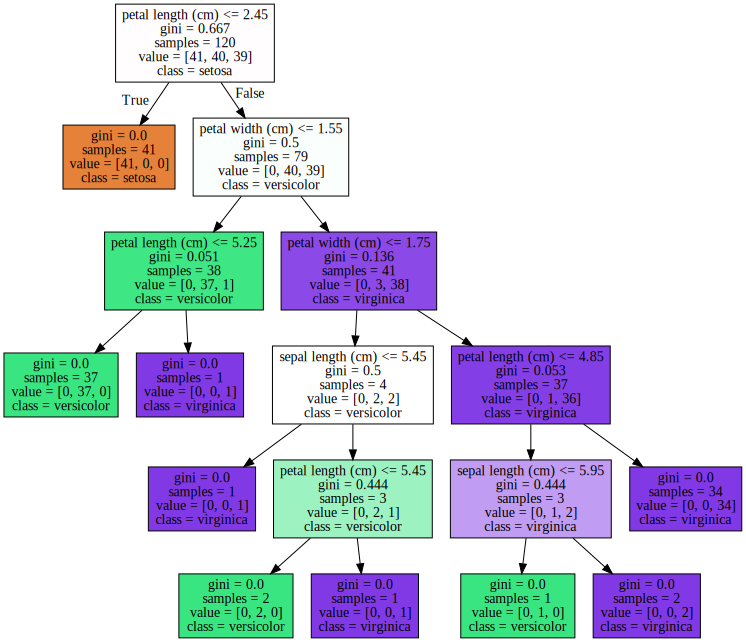

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* graphviz 트리 해석 
   * '.. <= ..'는 자식 노드를 만들기 위한 규칙 조건이다. 이 조건이 없으면 리프 노드다.
   * gini는 다음의 vlaue=[ ]로 주어진 데이터 분포에서의 지니 계수이다.
   * sampels는 현 규칙에 해당하는 데이터 건수이다.
   * vlaue = [ ]는 클래스 값 기반의 데이터 건수이다.
   
   
* 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다.
* 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 outlier에 강한 모델을 만들 수 있기 때문이다.
* 다음 feature_importances 를 보자.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


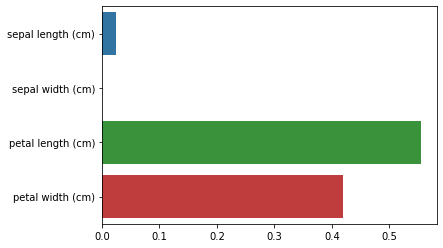

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

* 일반적으로 다른 알고리즘이 블랙박스로 불리듯이 알고리즘 내부의 동작 원리가 복잡한 데 반해 결정 트리는 알고리즘 자체가 직관적이고 해석적이기 때문에 알고리즘과 관련된 요소를 시각적으로 표현할 수 있는 다양한 방안이 있다.

### 4.2.4. 결정 트리 과적합

* 결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지, 이로 인한 과적합 문제를 시각화해보자.

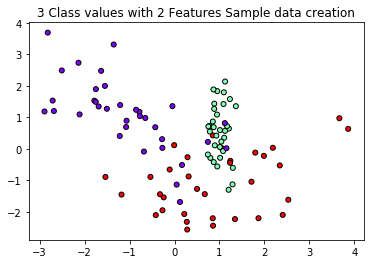

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [9]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

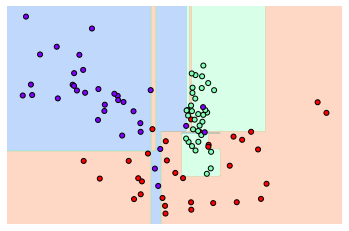

In [10]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

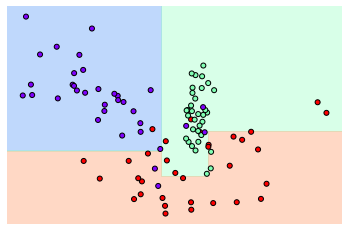

In [11]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 4.2.5. 결정 트리 실습 - Human Activity Recognition

https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


* 중복된 피처명 확인

In [3]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


* 원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생
* 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [5]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [6]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [7]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


* 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향을 살펴보자.

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.4min finished


GridSearchCV 최고 평균 정확도 수치:0.8526
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


In [10]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850925
1,8,0.852557
2,10,0.850925
3,12,0.844124
4,16,0.852149
5,20,0.851605
6,24,0.850245


* test 데이터 세트 사용

In [11]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


* 트리 깊이(max_depth)
* min_sample_split

In [12]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


GridSearchCV 최고 평균 정확도 수치: 0.8550
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [13]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


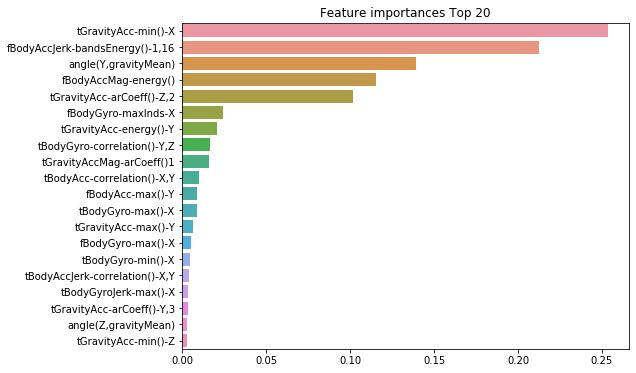

In [14]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

<div id='4.3.'/>

## 4.3. 앙상블 학습

* 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것.
* 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 가지고 있음.
* XGBoost 그리고 LightGBM과 같은 최신의 앙상블 모델 한두 개만 잘 알고 있어도 정형 데이터의 분류나 회귀 문제에서 예측 성능이 뛰어난 모델을 만들 수 있음.


* 앙상블 학습의 유형
   * Voting
      * 서로 다른 알고리즘을 가진 분류기를 결합하는 것.
   * Bagging (Voting 포함)
      * 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 Voting을 수행함.
      * 대표적인 Bagging 방식이 랜덤 포레스트 알고리즘.
      * 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 Bootstrapping 이라고 부름.
      * 개별 분류기가 Bootstrapping 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 Voting을 통해서 최종 예측 결과를 선정하는 방식이 배깅 앙상블 방식이다.
      * 데이터 세트 간에 중첩을 허용한다.
   * Boosting
      * Boosting은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행하는 것이다.
      * 계속해서 분류기에게 가중치를 부스팅하면서 학습을 진행하기에 부스팅 방식으로 불린다.
      * 예측 성능이 뛰어나 앙상블 학습을 주도하고 있음.
      * 대표적인 부스팅 모듈
         * Gradient Boost
         * XGBoost(eXtra Gradient Boost)
         * LightGBM(Light Gradient Boost)
   * ...
   * Stacking
      * 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법이다.

### 4.3.1. 보팅 유형 - Hard Voting 과 Soft Voting

* 일반적으로 Hard 보다는 Soft Voting이 예측 성능이 더 좋다.

<img src="./images/pic_4_5.png" width="100%" height="100%">

### 4.3.2. Voting Classifier

* VotingClassifier 클래스

In [15]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


* 보팅으로 여러 개의 분류기를 결합한다고 해서 무조건 성능 향상이 되지는 않음. (데이터 특성 및 분포 등 다양한 요건에 따라 달라짐)

In [16]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' ) # voting='hard' 기본값

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 구성되어 있다. 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에서 끌어낼 수 있다.
* 다양한 관점을 가지면 문제를 해결할 때 서로의 약점을 보완해서 높은 유연성을 가질 수 있을 것이다.


* 결정 트리는 과적합이 되기 쉽다. 수십~수천 개의 매우 많은 결정 트리 알고리즘을 결합해서 dropout 같은 효과를 가진다.

<div id='4.4.'/>

## 4.4. 랜덤 포레스트

* 배깅은 같은 알고리즘으로 서로 다른 학습 데이터셋을 샘플링으로 만들어서 마치 여러 개의 분류기가 학습되도록 하고, 보팅으로 최종 결정한다.
* 배깅의 대표적인 알고리즘은 랜덤 포레스트이다.
* 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가짐. 다양한 영역에서 높은 예측 성능을 보이고 있음.
* 랜덤 포레스트 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음. (랜덤 포레스트뿐만 아니라 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리 알고리즘을 기반 알고리즘으로 사용함)
* 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.

<img src="./images/pic_4_6.png" width="80%" height="80%">

* 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트이다. (Bootstrapping 분할 방식; Bagging은 bootstrap aggregating의 줄임말임; Bootstrap은 통계학에서 샘플링 방식임)

<img src="./images/pic_4_7.png" width="70%" height="70%">

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9108


### 4.4.1. 랜덤 포레스트 하이퍼 파라미터 튜닝

* 트리 기반의 앙상블 알고리즘의 단점을 굳이 뽑자면 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모된다.
* 더구나 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않아서 더욱 아쉽다.
* 트리 기반 자체의 하이퍼 파라미터 + 배깅, 부스팅, 학습, 정규화 등을 위한 하이퍼 파라미터까지 추가되므로 많다.
* 그나마 랜덤 포레스트가 적은 편이다. 결정 트리와 비슷.
   * n_estimators: 랜덤 포레스트에서 결정 트리의 개수를 지정
   * max_features: 결정 트리에 사용된 max_features와 같음
   * max_depth, min_samples_leaf 도 사용 (과적합 개선용)
   

* 랜덤 포레스트는 CPU 병렬 처리도 효과적으로 수행되어 빠른 학습이 가능하기 때문에 그래디언트 부스팅보다 예측 성능이 약간 떨어지더라도 랜덤 포레스트로 일단 기반 모델을 먼저 구축하는 경우가 많다. (n_jobs=-1로 하면 모든 CPU 코어를 사용)

In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9166


In [19]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


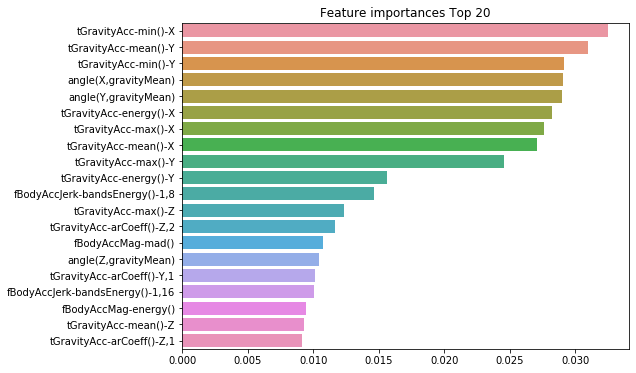

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

<div id='4.5.'/>

## 4.5. GBM(Gradient Boosting Machine)

* 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다.
* 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있다.
* AdaBoost는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘이다.
* 다음 그림은 AdaBoost의 학습 방식을 나타낸다.

<img src="./images/pic_4_8.png" width="80%" height="80%">

* 개별 약한 학습기는 다음 그림과 같이 각각 가중치를 부여해 결합한다. 그렇다면 가중치를 부여하는 기준은?

<img src="./images/pic_4_9.png" width="70%" height="70%">

* GBM(Gradient Boost Machine)도 AdaBoost와 유사하나, 가중치 업데이트를 경사 하강법(gradient descent)을 이용하는 것이 큰 차이이다.
* 분류의 실제 결괏값을 y, 피처를 X, 그리고 예측 함수를 F(X)라고 하면 오류식은 h(x) = y - F(X)가 된다. 이 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사 하강법이다. 학습하는 대상이 가중치라고 보면 된다. x 하나하나는 모델이 되겠다.

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 156.1 초 


* 사이킷런의 GradientBoostingClassifier는 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬처리가 지원되지 않아서 대용량 데이터의 경우 학습에 매우 많은 시간이 필요하다.
* 반면, 랜덤 포레스트는 상대적으로 빠른 수행 시간을 보장해준다.

### 4.5.1. GBM 하이퍼 파라미터 튜닝

* 결정 트리 관련 파라미터들은 지금까지 했던 내용 참조.
* loss: 경사 하강법에서 사용할 비용 함수를 지정 (디폴트: deviance)
* learning_rate: 학습률
* n_estimator: weak learner의 개수
* subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율 (기본값은 1(전체 사용)) (과적합이 염려되면 1보다 작은 수 설정)

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 14.0min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9014


In [23]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9396


* GBM은 과적합에 강한 뛰어난 예측 성능을 가진다.
* 단, 수행 시간이 오래 걸린다. (병렬 처리가 안 되기 때문)

<div id='4.6.'/>

## 4.6. XGBoost(eXtra Gradient Boost)

### 4.6.1. XGBoost 개요

* XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이다.
* XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결했다.
* 특히, XGBoost는 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습할 수 있다.


* XGBoost 장점
   * 뛰어난 예측 성능
   * GBM 대비 빠른 수행 시간
      * 병렬 프로세싱 사용으로 빠르다.
      * 일반적인 GBM보다 빠르다는 것이지, 다른 머신러닝 알고리즘(ex. 랜덤 포레스트)보다 빠른 것은 아니다.
   * 과적합 규제
      * 표준 GBM은 과적합 규제 기능이 없다. XGBoost는 자체에 해당 기능이 있다.
   * Tree pruning (나무 가지치기)
      * 일반적으로 GBM은 분할 시 부정 손실이 발생하면 분할을 더 이상 수행하지 않는다 (이러한 방식은 자칫 지나치게 많은 분할을 발생시킨다)
      * 다른 GBM과 마찬가지로 XGBoost도 max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄이는 추가적인 장점을 가진다.
   * 자체 내장된 교차 검증
      * XGBoost는 반복 수행 시마다 내부적으로 학습/평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있다.
      * 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있다.
   * 결손값 자체 처리
   
   
* XGBoost의 핵심 라이브러리는 C/C++로 작성.
* XGBoost 개발 그룹은 파이썬 API 제공
   * 파이썬 래퍼 XGBoost 모듈 (xgboost 패키지): 사이킷런과 호환되지 않는 독자적인 XgBoost 전용 패키지
      * 고유의 API와 하이퍼 파라미터 사용
   * 사이킷런 래퍼 XGBoost 모듈 (XGBClassifier, XGBRegressor)
      * fit( )과 predict( )와 같은 표준 사이킷런 개발 프로세스 및 다양한 유틸리티(cross_val_score, GridSearchCV, Pipeline 등) 활용 가능

### 4.6.2. 파이썬 래퍼 XGBoost

* 설치 
   * $ codna install -c anaconda py-xgboost
* 하이퍼 파라미터
   * 사이킷런 래퍼 XGBoost 모듈과 파라미터명이 다르다 (주의)
   
   
* 과적합 문제가 심각하다면 다음을 고려하자.
   * eta 값을 낮춘다 (0.01 ~ 0.1). eta 값을 낮출 경우 num_round(또는 n_estimators)는 반대로 높여줘야 한다.
   * max_depth 값을 낮춘다.
   * min_child_weight 값을 높인다.
   * gamma 값을 높인다.
   * subsample과 colsample_bytree를 조정한다 (트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움을 줌)
   
   
* xgboost 패키지는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고, 조기 중단 기능이 있어서 num_rounds 횟수에 도달하지 않아도 멈출 수도 있다.

#### 위스콘신 유방암 예측

In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [4]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


* 학습/테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성함. (XGBoost 전용 데이터 세트)
* DMatrix는 넘파이 외에 libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환할 수 있음.

In [31]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [32]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

In [40]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist)

In [42]:
# [0]	train-logloss:0.609688	eval-logloss:0.61352
# Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

# Will train until eval-logloss hasn't improved in 100 rounds.
# [1]	train-logloss:0.540803	eval-logloss:0.547842
# [2]	train-logloss:0.483753	eval-logloss:0.494248
# [3]	train-logloss:0.434457	eval-logloss:0.447986
# ...
# [308]	train-logloss:0.005471	eval-logloss:0.085998
# [309]	train-logloss:0.005464	eval-logloss:0.085877
# [310]	train-logloss:0.005457	eval-logloss:0.085923
# [311]	train-logloss:0.00545	eval-logloss:0.085948
# Stopping. Best iteration:
# [211]	train-logloss:0.006413	eval-logloss:0.085593

* 사이킷런의 predict( ) 메서드는 예측 결과를 클래스 값(0, 1)로 반환
* xgboost의 predict( ) 메서드는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환

In [36]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [38]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


* f0는 첫 번째 피처, f1는 두 번째 피처를 의미한다.

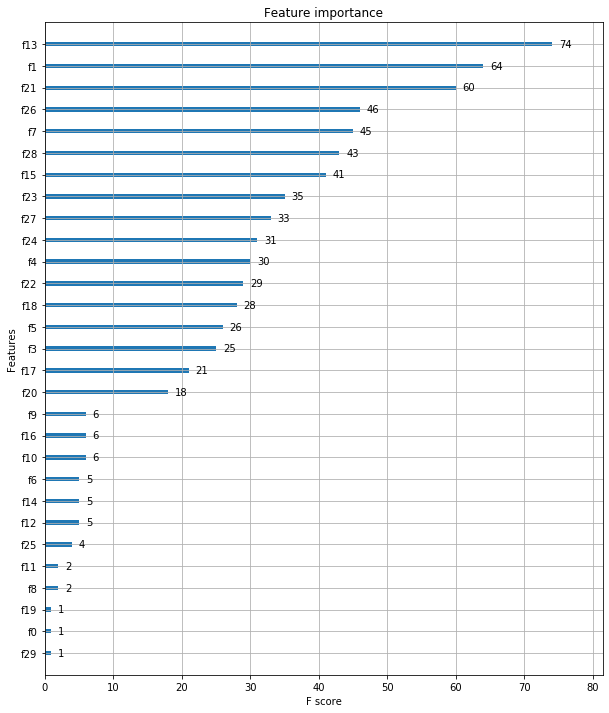

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

* xgboost 모듈의 to_graphviz( ) API를 이용하면 주피터 노트북에 규칙 트리 구조를 그릴 수 있음.
* 파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv( ) API로 제공한다.
   * `xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, metrics=(), ...`
   * xgb.csv의 반환값은 DataFrame 형태임.

### 4.6.3. 사이킷런 래퍼 XGBoost

* XGBoost 개발 그룹은 사이킷런의 프레임워크와 연동하기 위해 사이킷런 전용의 XGBoost 래퍼 클래스를 개발했다.
* 사이킷런의 기본 Estimator를 그대로 상속했기 때문에 다른 Estimator와 동일하게 fit( )과 predict( )만으로 학습과 예측이 가능하다.
* 그리고 GridSearchCV, Pipeline 등 사이킷런의 다른 유틸리티를 그대로 사용할 수 있기 때문에 XGBoost 래퍼 클래스만 바꾸면 기존 프로그램을 그대로 사용할 수 있다.


* XGBClassifier
* XGBRegressor


* XGBClassifier는 기존 사이킷런에서 사용하는 하이퍼 파라미터와 호환성을 유지하기 위해 기존의 xgboost 모듈에서 사용하던 네이티브 하이퍼 파라미터 몇 개를 다음과 같이 변경했다.
   * eta -> learning_rate
   * sub_sample -> subsample
   * lambda -> reg_lambda
   * alpha -> reg_alpha
   * num_boost_round -> n_estimators

#### 위스콘신 유방암 예측

In [5]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [8]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [10]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [11]:
# [0]	validation_0-logloss:0.61352
# Will train until validation_0-logloss hasn't improved in 100 rounds.
# [1]	validation_0-logloss:0.547842
# [2]	validation_0-logloss:0.494247
# ...
# [311]	validation_0-logloss:0.085948
# Stopping. Best iteration:
# [211]	validation_0-logloss:0.085593

In [12]:
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


* early_stopping_rounds=100일 때 0.9954이고, early_stopping_rounds=10일때는 0.9947이다.

In [14]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

In [ ]:
# [0]	validation_0-logloss:0.61352
# Will train until validation_0-logloss hasn't improved in 10 rounds.
# [1]	validation_0-logloss:0.547842
# [2]	validation_0-logloss:0.494247
# ...
# [62]	validation_0-logloss:0.090311
# Stopping. Best iteration:
# [52]	validation_0-logloss:0.089577

# 오차 행렬
# [[34  3]
#  [ 2 75]]
# 정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9947

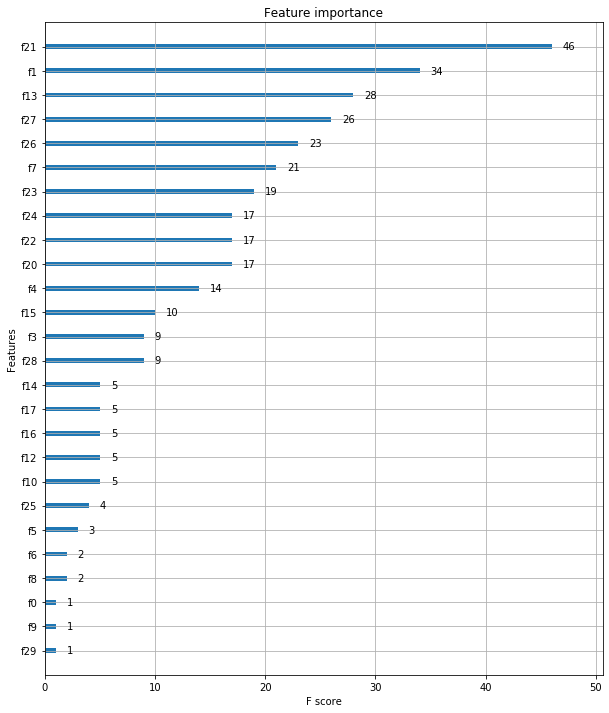

In [15]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

<div id='4.7.'/>

## 4.7. LightGBM

* LightGBM은 XGBoost와 함께 부스팅 계열 알고리즘에서 가장 각광을 받고 있다.
* Xgboost는 매우 뛰어난 부스팅 알고리즘이지만, 여전히 학습 시간이 오래 걸린다.
   * GridSearchCV로 하이퍼 파라미터 튜닝을 하면 수행 시간이 너무 오래 걸려서 많은 파라미터를 튜닝하기 어렵다.
   * 물론 Gradient Boosting Methods 보다는 빠르지만, 대용량 데이터의 경우 많은 CPU 코어에서 높은 병렬도로 학습을 해야 한다.


* LightGBM의 큰 장점은 XGBoost보다 학습 시간이 훨씬 적다는 점이다. 또한, 메모리 사용량도 상대적으로 적다.
* LightGBM과 XGBoost의 예측 성능은 별다른 차이가 없다. 또한, 기능상의 다양성은 LightGBM이 조금 더 많다.
   * LightGBM이 XGBoost보다 2년 후에 만들어져서 장점은 계승하고 단점을 보완했을 것 같다.
* LightGBM의 한 가지 단점은 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬운 것이다. (일반적으로 10,000건 이하 - LightGBM 공식 문서)


* LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심(Leaf-wise) 트리 분할 방식을 사용한다.
* 기존의 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위해 균형 중심(Level-wise) 트리 분할 방식을 사용한다.
   * 즉, 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리의 깊이가 최소화될 수 있다.
   * 이렇게 균형 잡힌 트리를 생성하는 이유는 오버피팅에 보다 더 강한 구조를 가질 수 있다고 알려져 있기 때문이다.
   * 반대로 균형을 맞추기 위한 시간이 더 필요하다는 상대적인 단점이 있다.
* LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성된다.
   * 이렇게 최대 손실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있다는 것이 LightGBM의 구현 사상이다.
   
<img src="./images/pic_4_11.png" width="100%" height="100%">


* LightGBM의 XGBoost 대비 장점
   * 더 빠른 학습과 예측 수행 시간 (최근에는 GPU까지 지원)
   * 더 작은 메모리 사용량
   * 카테고리형 피처의 자동 변환과 최적 분할
      * 원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따르 노드 분할 수행
      
      
* LightGBM도 XGBoost와 마찬가지로 최에는 파이썬 래퍼용 LightGBM만 개발.
* 이후 사이킷런과의 호환성을 지원하기 위해 사이킷런 래퍼 LightGBM이 추가로 개발.

* LightGBM 하이퍼 파라미터
   * 주의할 점은 LightGBM은 Xgboost와 다르게 리프 노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터 설정이 필요하다 (ex. max_depth를 매우 크게 가짐)
   * 주요 파라미터 (괄호는 LightGCM 사이킷런)
      * num_iterations (n_estimators): 반복 수행하려는 트리의 개수를 지정한다.
      * learning_rate
      * max_depth: 트리 기반 알고리즘의 max_depth와 같음. 지금까지 소개한 depth-wise 방식의 트리와 다르게 LightGBM은 leaf-wise 기반이므로 깊이가 상대적으로 더 깊다.
      * min_data_in_leaf: 결정 트리의 min_samples_leaf와 같은 파라미터이다. 
      * num_leaves: 하나의 트리가 가질 수 있는 최대 리프 개수이다.
      * boosting (default: gbdt): 부스팅의 트리를 생성하는 알고리즘을 기술한다.
         * gbdt: 일반적인 그래디언트 부스팅 결정 트리
         * rf: 랜덤 포레스트
      * bagging_fraction (subsample): 데이터 샘플링하는 비율
      * feature_fraction (colsample_bytree): 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율
      * lambda_l2: L2 제어 값
      * lambda_l1: L1 제어 값
   

* 하이퍼 파라미터 튜닝 방안
   * num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 뉴팅 방안이다.
   * learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안이다. (너무 큰 n_estimators는 과적합 주의)
   * 과적합을 제어하기 위해서 
      * reg_lambda, reg_alpha와 같은 regularization을 적용한다.
      * 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터를 적용한다.
 
 
* 파이썬 래퍼 LightGBM 과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

<img src="./images/pic_4_10.png" width="100%" height="100%">
 
 
* 설치
   * $ conda install -c conda-forge lightgbm

#### 위스콘신 유방암 예측

In [16]:
import lightgbm

print(lightgbm.__version__)

2.3.0


In [18]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
# [1]	valid_0's binary_logloss: 0.565079
# Training until validation scores don't improve for 100 rounds
# [2]	valid_0's binary_logloss: 0.507451
# [3]	valid_0's binary_logloss: 0.458489
# ...
# [146]	valid_0's binary_logloss: 0.190334
# [147]	valid_0's binary_logloss: 0.192769
# Early stopping, best iteration is:
# [47]	valid_0's binary_logloss: 0.126108

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [20]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9926


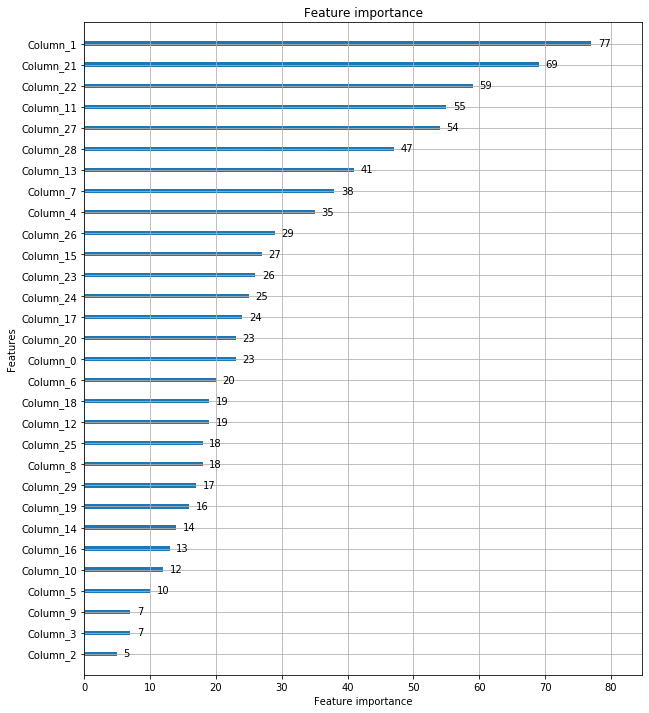

In [21]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

<div id='4.8.'/>

## 4.8. 캐글 산탄데르 고객 만족 예측

* XGBoost 와 LightGBM 사용


* 산탄데르 고객 만족 예측 분석은 370개의 피처로 주어진 데이터 세트 기반에서 고개 만족 여부를 예측하는 것이다.
* 모델의 성능 평가는 ROC-AUC로 평가한다. 대부분이 만족이고 불만족인 데이터는 일부일 것이기 때문에 정확도 수치보다는 ROC-AUC가 더 적합하다.

### 4.8.1. 데이터 전처리

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [24]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [25]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [26]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [27]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True) # -999999은 다른 값에 비해 편차가 심하므로 가장 값이 많은 2로 변환.
cust_df.drop('ID',axis=1 , inplace=True) # ID는 단순히 식별자이므로 삭제

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### 4.8.2. XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

In [37]:
# [0]	validation_0-auc:0.799928	validation_1-auc:0.803548
# Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

# Will train until validation_1-auc hasn't improved in 100 rounds.
# [1]	validation_0-auc:0.802222	validation_1-auc:0.805222
# [2]	validation_0-auc:0.80819	validation_1-auc:0.813162
# [3]	validation_0-auc:0.8127	validation_1-auc:0.813243
# ...
# [276]	validation_0-auc:0.874743	validation_1-auc:0.841319
# [277]	validation_0-auc:0.874795	validation_1-auc:0.841353
# [278]	validation_0-auc:0.874858	validation_1-auc:0.841289
# Stopping. Best iteration:
# [178]	validation_0-auc:0.866004	validation_1-auc:0.841863

# ROC AUC: 0.8419

In [38]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

In [39]:
# [0]	validation_0-auc:0.722196	validation_1-auc:0.727319
# Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

# Will train until validation_1-auc hasn't improved in 30 rounds.
# [1]	validation_0-auc:0.734627	validation_1-auc:0.738666
# [2]	validation_0-auc:0.796925	validation_1-auc:0.800096
# ...
# [73]	validation_0-auc:0.868278	validation_1-auc:0.842992
# [74]	validation_0-auc:0.868331	validation_1-auc:0.842965
# Stopping. Best iteration:
# [44]	validation_0-auc:0.859317	validation_1-auc:0.843713

# [0]	validation_0-auc:0.725029	validation_1-auc:0.729001
# Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

# Will train until validation_1-auc hasn't improved in 30 rounds.
# [1]	validation_0-auc:0.740821	validation_1-auc:0.742045
# [2]	validation_0-auc:0.804758	validation_1-auc:0.799751
# ...
# [95]	validation_0-auc:0.889635	validation_1-auc:0.841264
# [96]	validation_0-auc:0.889788	validation_1-auc:0.841158
# Stopping. Best iteration:
# [66]	validation_0-auc:0.884712	validation_1-auc:0.842365

# [0]	validation_0-auc:0.735925	validation_1-auc:0.743682
# Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

# Will train until validation_1-auc hasn't improved in 30 rounds.
# [1]	validation_0-auc:0.75066	validation_1-auc:0.757649
# [2]	validation_0-auc:0.811959	validation_1-auc:0.813236
# ...
# [72]	validation_0-auc:0.877694	validation_1-auc:0.843082
# [73]	validation_0-auc:0.877811	validation_1-auc:0.843184
# Stopping. Best iteration:
# [43]	validation_0-auc:0.86513	validation_1-auc:0.843844

# GridSearchCV 최적 파라미터: {'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 1}
# ROC AUC: 0.8438

In [40]:
%%time

# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

In [41]:
# [0]	validation_0-auc:0.754936	validation_1-auc:0.758685
# Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

# Will train until validation_1-auc hasn't improved in 200 rounds.
# [1]	validation_0-auc:0.816309	validation_1-auc:0.818612
# [2]	validation_0-auc:0.832377	validation_1-auc:0.825469
# [3]	validation_0-auc:0.835699	validation_1-auc:0.827201
# ...
# [420]	validation_0-auc:0.91209	validation_1-auc:0.84379
# Stopping. Best iteration:
# [220]	validation_0-auc:0.894671	validation_1-auc:0.846304

# ROC AUC: 0.8463
# CPU times: user 12min 4s, sys: 2.54 s, total: 12min 6s
# Wall time: 12min 5s

* XGBoost가 한 가지 아쉬운 점은 GBM보다는 빠르지만 아무래도 GBM 기반으로 하기 때문에 수행 시간이 상당하다는 점이다.
   * 이 때문에 하이퍼 파라미터 튜닝 시간이 오래 걸린다.
* 앙상블 계열 알고리즘에서 하이퍼 파라미터 튜닝으로 성능 개선이 급격하게 되는 경우는 많지 않다.
   * 앙상블 계열 알고리즘은 과적합이나 잡음에 기본적으로 뛰어난 알고리즘이기에 그렇다.

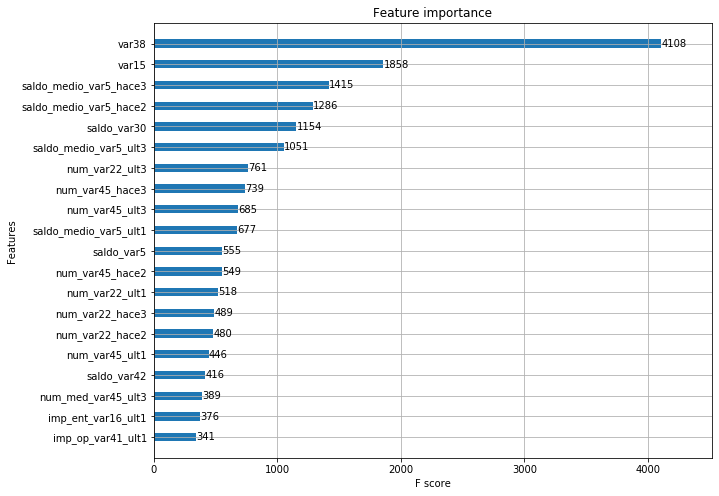

In [33]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### 4.8.3. LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [43]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [42]:
# [1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
# Training until validation scores don't improve for 100 rounds
# [2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
# [3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
# ...
# [141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
# [142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
# Early stopping, best iteration is:
# [42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
# ROC AUC: 0.8396

In [45]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [48]:
# [1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
# Training until validation scores don't improve for 30 rounds
# [2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
# [3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
# ...
# [50]	valid_0's auc: 0.895288	valid_0's binary_logloss: 0.118352	valid_1's auc: 0.842965	valid_1's binary_logloss: 0.138309
# [51]	valid_0's auc: 0.895902	valid_0's binary_logloss: 0.118145	valid_1's auc: 0.842827	valid_1's binary_logloss: 0.138343
# [52]	valid_0's auc: 0.896512	valid_0's binary_logloss: 0.11792	valid_1's auc: 0.842926	valid_1's binary_logloss: 0.138311
# Early stopping, best iteration is:
# [22]	valid_0's auc: 0.871544	valid_0's binary_logloss: 0.126309	valid_1's auc: 0.844171	valid_1's binary_logloss: 0.139253
# GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
# ROC AUC: 0.8442

In [46]:
%%time

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [47]:
# [1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
# Training until validation scores don't improve for 100 rounds
# [2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
# [3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
# ...
# [121]	valid_0's auc: 0.839406	valid_0's binary_logloss: 0.139363
# [122]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.139379
# Early stopping, best iteration is:
# [22]	valid_0's auc: 0.844171	valid_0's binary_logloss: 0.139253
# ROC AUC: 0.8442
# CPU times: user 7.46 s, sys: 173 ms, total: 7.63 s
# Wall time: 5.16 s

* 12분 5초 vs. 5초

<div id='4.9.'/>

## 4.9. 캐글 신용카드 사기 검출

* 데이터 클래스 분포가 매우 불균형하다. (전체 데이터의 약 0.172%만이 레이블 값이 1, 즉 사기 트랜잭션이다)
* 일반적으로 사기 검출(Fraud Detection)이나 이상 검출(Anomaly Detection) 문제는 극도로 불균형한 클래스 분포를 가지기 쉽다.

### 4.9.1. 언더 샘플링과 오버 샘플링의 이해

* 이상 레이블을 가지는 데이터 건수는 매우 적기 때문에 제대로 다양한 유형을 학습하지 못하는 반면에 정상 레이블을 가지는 데이터 건수는 매우 많아서 일방적으로 정상 레이블로 치우친 학습을 수행한다.
* 해결 방법으로 오버 샘플링(oversampling)과 언더 샘플링(undersampling) 방법이 있으며, 오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많아 주로 사용된다.
* 언더 샘플링은 정상 레이블 데이터를 이상 레이블 데이터 수준으로 줄여버리면 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있지만, 너무 많은 정상 레이블 데이터를 감소시키기 때문에 정상 레이블의 경우 오히려 제대로 된 학습을 수행할 수 없다.
* 오버 샘플링은 원본 데이터의 피처 값들을 아주 약간만 변경하여 증식한다. 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique)이 있다.
   * SMOTE는 KNN 알고리즘을 활용하여 새로운 데이터를 생성한다.
   
<img src="./images/pic_4_12.png" width="90%" height="90%">
   
* SMOTE 설치
   * `$ conda install -c conda-forge imbalanced-learn`

### 4.9.2. 데이터 일차 가공 및 모델 학습/예측/평가

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [3]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [4]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

* 베이스라인: logistic regression

In [6]:
%%time

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85281    14]
 [   60    88]]
정확도: 0.9991, 정밀도: 0.8627, 재현율: 0.5946,    F1: 0.7040, AUC:0.9587
CPU times: user 10.3 s, sys: 221 ms, total: 10.6 s
Wall time: 1.82 s


In [7]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

* 본 데이터셋은 극도로 불균형한 클래스 분포를 가지므로 boost_from_average=False 파라미터 설정이 필요하다.
* 극도로 불균형한 클래스 분포에서 boost_from_average=True 설정은 재현률 및 ROC-AUC 성능을 매우 크게 저하시킨다.
   * https://github.com/Microsoft/LightGBM/issues/1487

In [8]:
%%time

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9797
CPU times: user 1min 13s, sys: 944 ms, total: 1min 14s
Wall time: 6.69 s


### 4.9.3. 데이터 분포도 변환 후 모델 학습/예측/평가

* Amount 피처는 신용 카드 사용 금액으로 정상/사기 트랜잭션을 결정하는 매우 중요한 속성일 가능성이 높다.

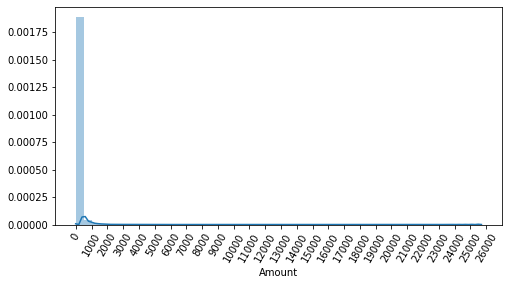

In [9]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

* Amount 피처를 정규 분포로 만들자. (성능에 큰 변화 없음)

In [10]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [11]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9773


* Amount 피처에 로그 변환을 해보자. (약간 성능 개선 확인)

In [12]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [13]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9786


### 4.9.4. 이상치 데이터 제거 후 모델 학습/예측/평가

* IQR(Inter Quantile Range)를 기준으로 이상치를 제거하자.

<img src="./images/pic_4_13.png" width="70%" height="70%">

<img src="./images/pic_4_14.png" width="80%" height="80%">

* 먼저 어떤 피처의 이상치 데이터를 검출할 것인지 선택이 필요
* 매우 많은 피처가 있을 경우 이들 중 결정값(즉 레이블)과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋다.
   * 모든 피처들의 이상치를 검출하는 것은 시간이 많이 소요.
   * 결정값과 상관성이 낮은 피처들의 경우는 이상치를 제거해도 크게 성능 향상에 기여하지 않음.

* 피처별 상관도 측정
   * 결정 레이블 클래스 피처와 음의 상관관계가 가장 높은 피처는 V14, V17 이다.
   * 이중에서 V14에 대해서만 이상치를 찾아서 제거해보자.

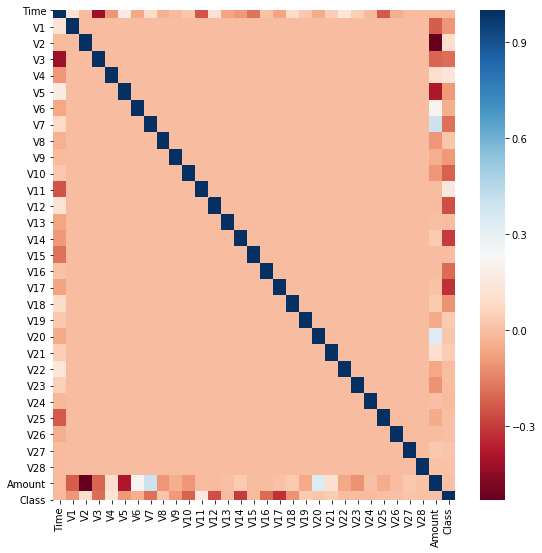

In [14]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu') 
# 'RdBu': 양의 상관관계가 높을수록 색깔이 진한 파란색에 가깝고, 음의 상관관계가 높을수록 색깔이 진한 빨간색에 가까움.

* V1 피처 이상치 제거 후 학습 결과 (모두 성능 향상 확인)

In [15]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [16]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [17]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9831


### 4.9.5. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

* SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링을 해야 한다.

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

Using TensorFlow backend.


SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
Name: Class, dtype: int64


In [19]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

* 로지스틱 회귀 모델의 경우 SMOTE로 오버 샘플링된 데이터로 학습할 경우 재현율이 92.47%로 크게 증가하지만, 반대로 정밀도가 5.4% 급격하게 저하되었다.
* 재현율이 높더라도 정밀도가 저조하면 현실 업무에 적용하기 힘들다.
* 정밀고와 재현율 곡선을 통해 SMOTE로 학습된 로지스틱 회귀 모델에 어떠한 문제가 발생하고 있는지 시각적으로 살펴보자.
   * 임계값이 0.99 이하에서는 재현율이 매우 좋고 저임ㄹ도가 극단적으로 낮다가 0.99 이상에서는 반대로 재현율이 대폭 떨어지고 정밀도가 높아진다.
   * 분류 결정 임계값을 조정하더라도 임계값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없으므로 로지스틱 회귀 모델의 경우 SMOTE 적용 후 올바른 예측 모델이 생성되지 못했다.

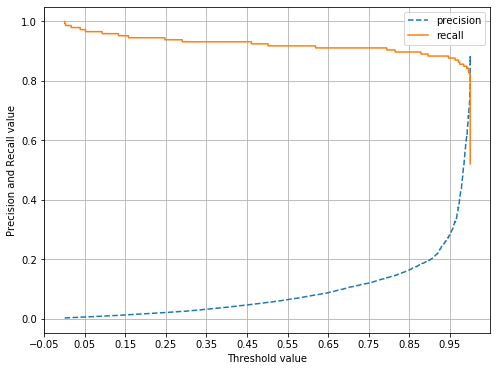

In [21]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [22]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85286     9]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493,    F1: 0.8889, AUC:0.9789


* 재현율이 이상치만 제거한 경우인 82.88%보다 높은 84.93%가 되고, 정밀도는 이전의 96.8%보다 낮은 93.23%이다.
* SMOTE를 적용하면 재현율은 높아지나, 정밀도는 낮아지는 것이 일반적이다.
* 좋은 SMOTE 패키지일수록 재현율 증가율은 높이고 정밀도 감소율을 낮출 수 있도록 효과적으로 데이터를 증식한다.


* 다양한 방법으로 가공된 데이터를 적용한 결과이다.

<img src="./images/pic_4_16.png" width="100%" height="100%">


<div id='4.10.'/>

## 4.10. 스태킹 앙상블

* 스태킹(Stacking)은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅 및 부스팅과 공통점을 가진다.
* 하지만, 큰 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 것이다.
   * 개별 알고리즘의 예측 결과의 데이터셋을 최종적인 메타 데이터셋으로 만들고, 
   * 별도의 ML 알고리즘으로 최종 학습을 수행하고,
   * 테스트 데이터를 기반으로 다시 최종 예측을 수행함.
   * (참고) 메타 모델: 개별 모델의 예측된 데이터셋을 다시 기반으로 하여 학습하고 예측하는 방식
* 스태킹 모델은 두 종류의 모델이 필요하다.
   * 개별적인 기반 모델
   * 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델
* 스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터셋과 테스트용 피처 데이터셋을 만드는 것이다.
* 스태킹을 현실 모델에 적용하는 경우는 그렇게 많지는 않지만, 캐글과 같은 대회에서 높은 순위를 차지하기 위해 조금이라도 성능 수치를 높여야 할 경우 자주 사용된다. (즉, 속도는 포기하고 정확도만 최대로 올리고 싶을 때 사용)
* 일반적으로 성능이 비슷한 모델을 결합해 좀 더 나은 성능 향상을 도출하기 위해 적용된다.
* 아래 그림은 개념적인 그림으로 추상적으로 스태킹 메카니즘을 이해하자.

<img src="./images/pic_4_15.png" width="50%" height="50%">


* 먼저 모델별로 도출된 예측 레이블 값을 다시 합해서(스태킹) 새로운 데이터셋을 만들고 이렇게 스태킹된 데이터셋에 대해 최종 모델을 적용해 최종 예측을 하는 것이 스태킹 앙상블 모델이다.
* 최종 모델도 학습은 꼭 학습 데이터만 사용해야 한다는 것을 인지하자. (절대 y_test 값을 사용해서는 안된다)
* 아래 그림은 기본 스태킹 그리고 CV 세트 기반의 스태킹에 모두 해당되는 내용이다. 

<img src="./images/pic_4_20.png" width="90%" height="90%">

* CV 세트 기반의 스태킹은 재료를 만들 때 다음 내용이 추가된다.

<img src="./images/pic_4_17.png" width="90%" height="90%">

<img src="./images/pic_4_18.png" width="90%" height="90%">

<img src="./images/pic_4_19.png" width="90%" height="90%">

### 4.10.1. 기본 스태킹 모델

* 위스콘신 암 데이터 세트
* 개별 모델: KNN, 랜덤 포레스트, 결정 트리, 에이다보스트
* 최종 모델: 로지스틱 회귀 (개별 모델의 예측 결과를 합한 데이터셋으로 학습/예측하는 최종 모델)

In [23]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [24]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [25]:
# 개별 모델: 학습 데이터 기준 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

* 아래 코드는 본인이 수정한 코드이다.

In [30]:
# 개별 모델: 학습 데이터 기준 예측. 
knn_X_train_pred = knn_clf.predict(X_train)
rf_X_train_pred = rf_clf.predict(X_train)
dt_X_train_pred = dt_clf.predict(X_train)
ada_X_train_pred = ada_clf.predict(X_train)

In [31]:
X_train_pred = np.array([knn_X_train_pred, rf_X_train_pred, dt_X_train_pred, ada_X_train_pred])
print(X_train_pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
X_train_pred = np.transpose(X_train_pred)
print(X_train_pred.shape)

(4, 455)
(455, 4)


In [33]:
# 개별 모델: 테스트 데이터 기준 예측. 
knn_X_test_pred = knn_clf.predict(X_test)
rf_X_test_pred = rf_clf.predict(X_test)
dt_X_test_pred = dt_clf.predict(X_test)
ada_X_test_pred = ada_clf.predict(X_test)

In [34]:
X_test_pred = np.array([knn_X_test_pred, rf_X_test_pred, dt_X_test_pred, ada_X_test_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
X_test_pred = np.transpose(X_test_pred)
print(X_test_pred.shape)

(455, 4)
(114, 4)


* 최종 모델
* 스태킹 기법의 최종 모델이 개별 모델보다 성능이 좋다는 보장은 없다.

In [35]:
lr_final.fit(X_train_pred, y_train) # 학습을 하려면 학습 데이터만 사용할 수 밖에 없다.
final = lr_final.predict(X_test_pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9649


* 아래는 개별 모델 성능 참고

In [27]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


* 아래는 뭐지? y_test를 어떻게 아나 우리가? 이것은 무슨 호용이 있는 모델인가? 그냥 예시로 이해해야겠다.

In [36]:
# pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
# print(pred.shape)

# # transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
# pred = np.transpose(pred)
# print(pred.shape)

In [29]:
# lr_final.fit(pred, y_test)
# final = lr_final.predict(pred)

# print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


### 4.10.2. CV 세트 기반의 스태킹

* 과적합을 개선하기 위해, 최종 메타 모델을 위한 데이터셋을 만들 때, 교차 검증 기반으로 예측된 결과의 데이터셋을 이용한다.
* 앞 예제에서 최종 메타 모델인 로지스틱 회귀 모델이 학습할 때 레이블 데이터셋으로 학습 데이터가 아닌 테스트 레이블 데이터셋을 기반으로 학습했기에 과적합 문제가 발생할 수 있다.

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [38]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [39]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


* 여기선 y_test를 사용하지 않네, 이게 정상적인 스태킹 기법인 것 같다.

In [40]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


* 스태킹을 이루는 모델은 최적의 파라미터를 튜닝한 상태에서 스태킹 모델을 만드는 것이 일반적이다.

## 4.11. 정리

* 대부분의 앙상블 기법은 결정 트리 기반의 다수의 약한 학습기(weak learner)를 결합해 변동성을 줄여 예측 오류를 줄이고 성능을 개선한다.
* 앙상블 기법은 대표적으로 배깅과 부스팅으로 구분될 수 있다.
* 현대의 앙상블 기법은 배깅보다는 부스팅이 더 주류를 이루고 있다.